<a href="https://colab.research.google.com/github/beriaacan/Machine-Learning-Algorithms/blob/main/Application%20of%20Gaussian%20Naive%20Bayes/Application_of_Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

090200705 Beria Ayşenur CAN

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [3]:
class GaussianNB:
    def __init__(self, priors=None, var_smoothing=1e-9):
        self.priors = priors
        self.var_smoothing = var_smoothing
        self.theta_ = None
        self.var_ = None
        self.class_priors_ = None
        self.classes_ = None

    def _check_input(self, X):
        """Ensure the input is a numpy array of numeric types."""
        if not isinstance(X, np.ndarray):
            try:
                X = np.array(X, dtype=np.float64)
            except ValueError:
                raise ValueError("Input data X must be a numeric array.")
        return X


    def logprior(self, class_ind):
        return np.log(self.class_priors_[class_ind])

    def loglikelihood(self, Xi, class_ind):
        mean = self.theta_[class_ind]
        var = self.var_[class_ind]

        # Debugging print statements
        #print("Xi type:", type(Xi), "Xi shape:", Xi.shape)
        #print("Mean type:", type(mean), "Mean shape:", mean.shape)
        #print("Var type:", type(var), "Var shape:", var.shape)

        numerator = -0.5 * np.sum(np.log(2. * np.pi * var))
        denominator = -0.5 * np.sum(((Xi - mean) ** 2) / var)
        return numerator + denominator

    def posterior(self, Xi, class_ind):
        return self.logprior(class_ind) + self.loglikelihood(Xi, class_ind)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.theta_ = np.zeros((n_classes, n_features))
        self.var_ = np.zeros((n_classes, n_features))
        self.class_priors_ = np.zeros(n_classes)

        for c_ind, c_id in enumerate(self.classes_):
            X_class = X[y == c_id]
            self.theta_[c_ind, :] = np.mean(X_class, axis=0)
            self.var_[c_ind, :] = np.var(X_class, axis=0) + self.var_smoothing
            self.class_priors_[c_ind] = np.sum(y == c_id) / n_samples


    def predict(self, X):
        X = self._check_input(X)  # Ensuring X is a NumPy array
        predictions = []
        for xi in X:
            # Debugging: Check the type of xi
            if isinstance(xi, str):
                print("Error: Non-numeric data found:", xi)
                continue

            post = [self.posterior(xi, class_ind) for class_ind in range(len(self.classes_))]
            predictions.append(self.classes_[np.argmax(post)])
        return np.array(predictions)


In [4]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# this pandas dataframe for easier data manipulation
df_cancer = pd.DataFrame(X, columns=feature_names)

In [6]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


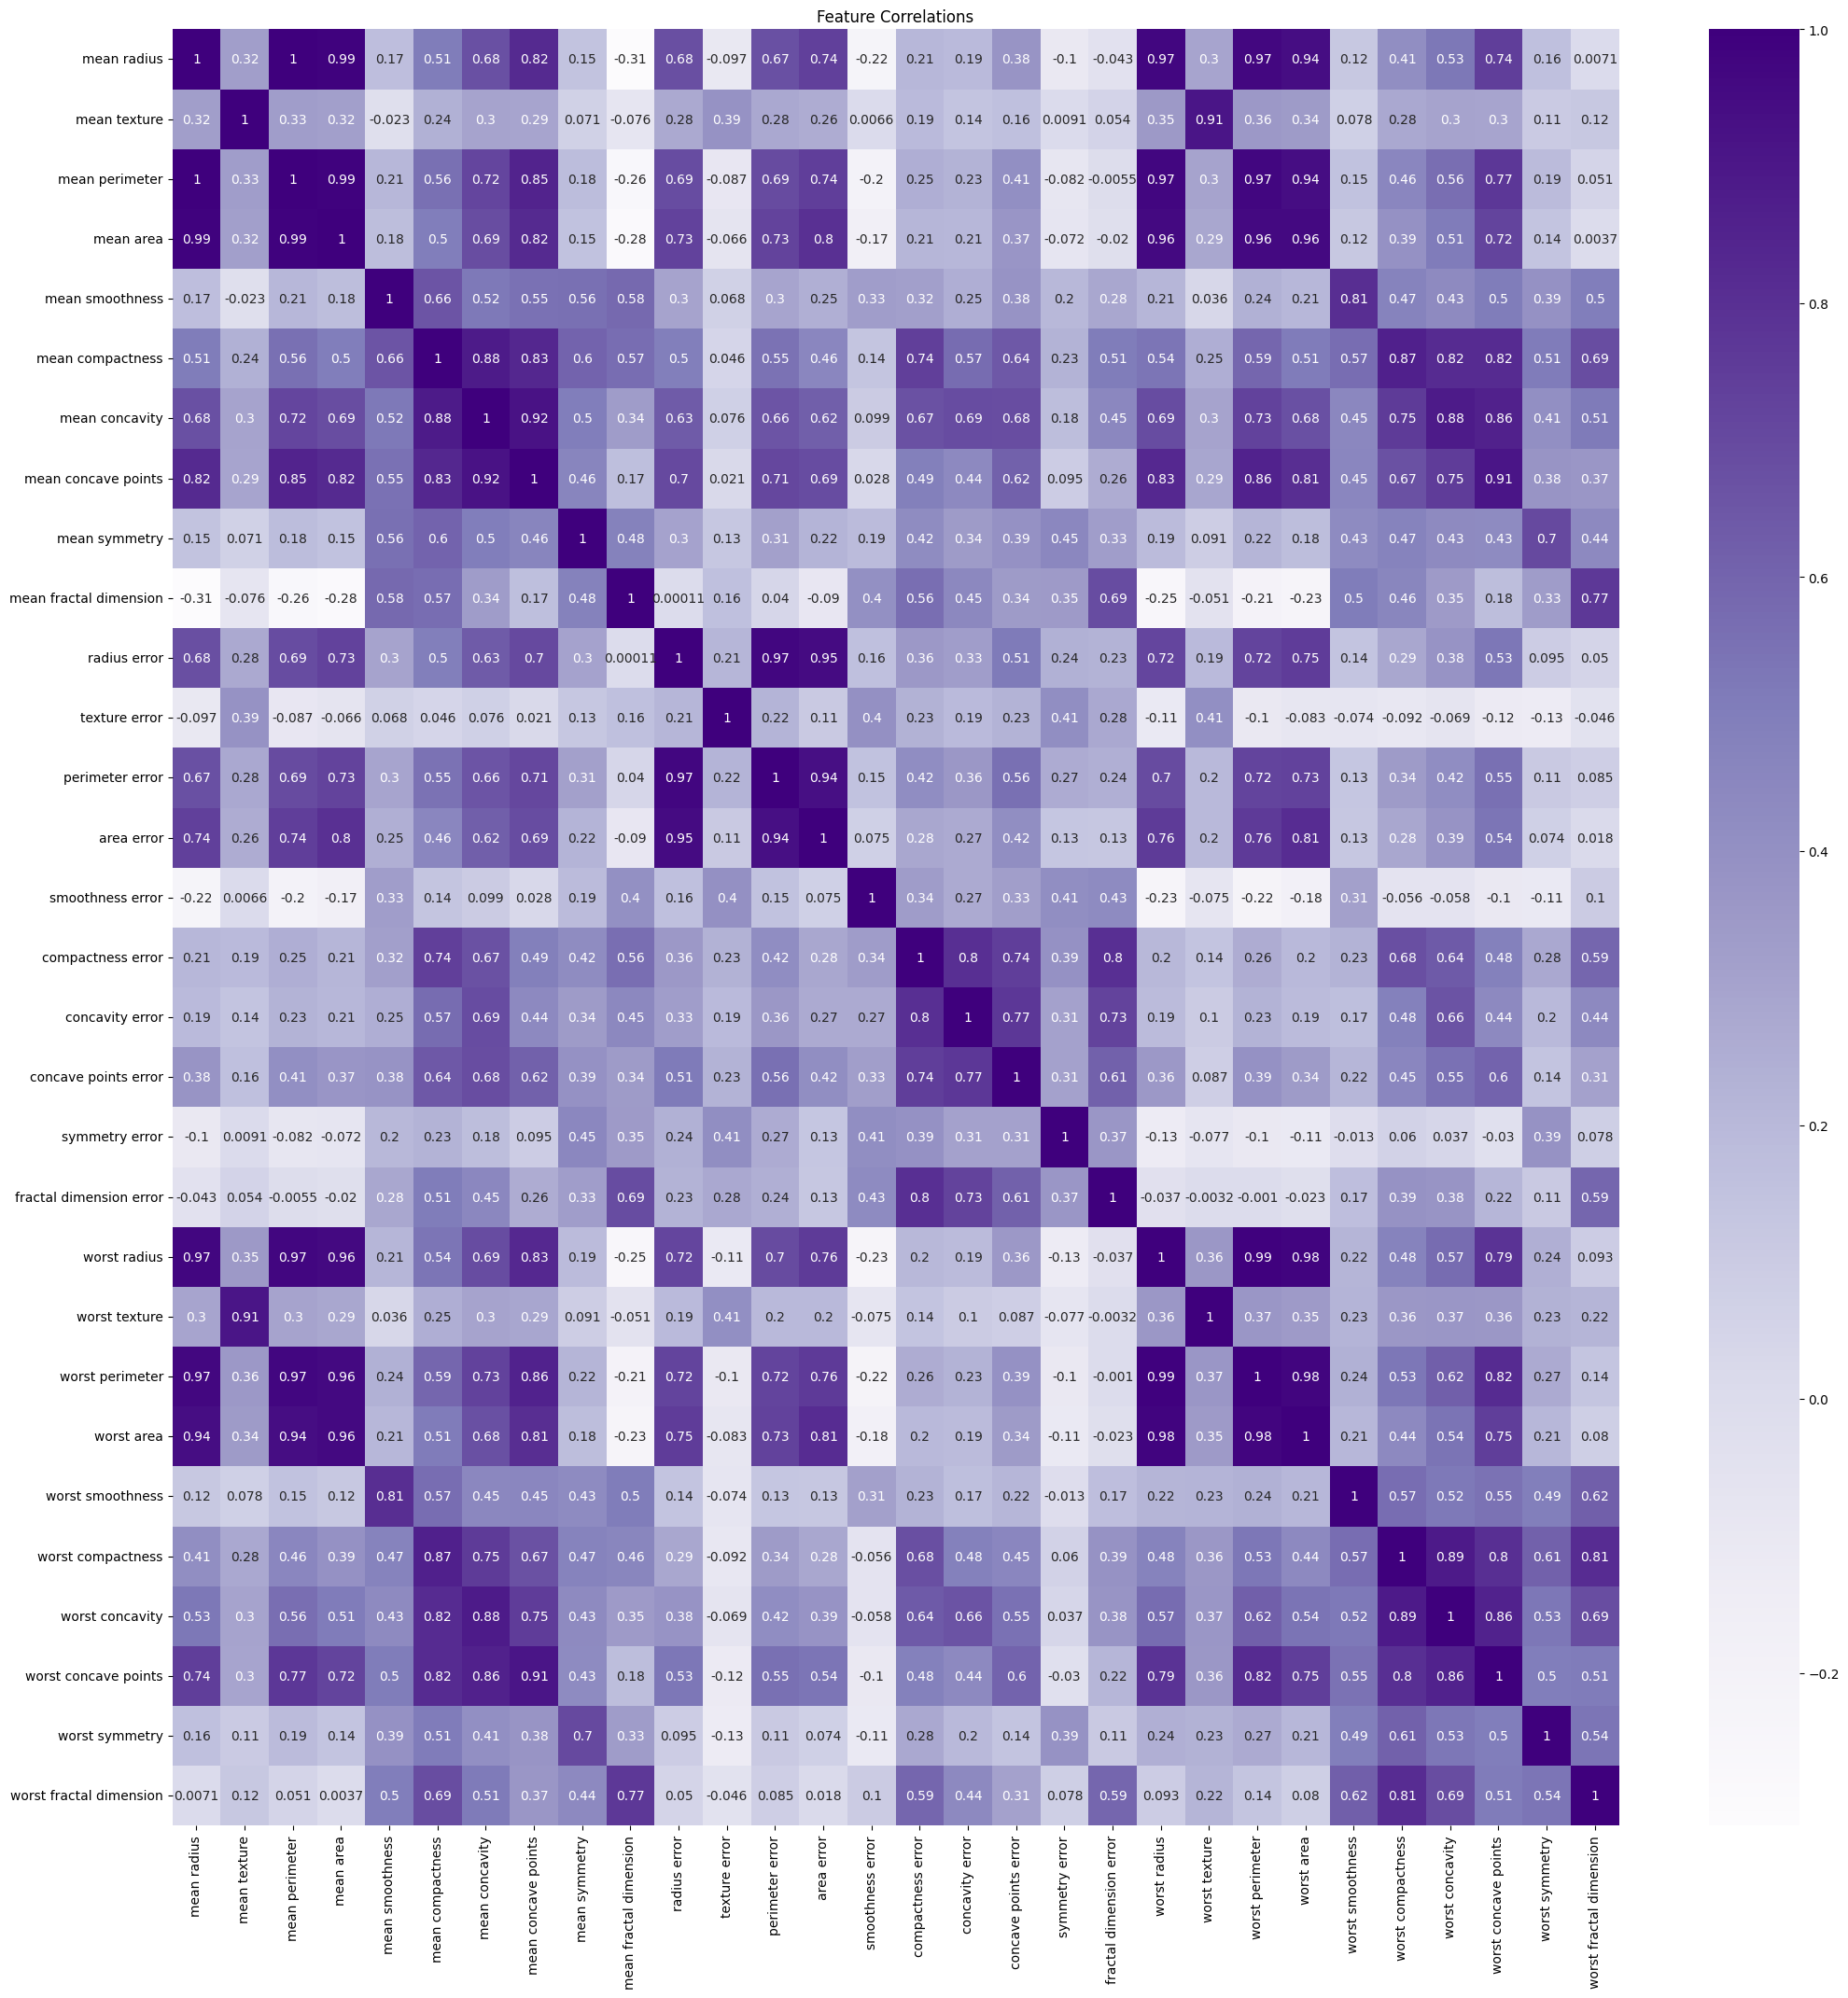

In [7]:
#korelasyon matrisi
corr = df_cancer.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title("Feature Correlations")
plt.show()


1. Naive Bayes modeli, özelliklerin (features) birbirinden bağımsız olduğu varsayımı üzerine kuruludur. Yani, bir özelliğin değeri değiştiğinde, bu değişikliğin diğer özellikler üzerinde hiçbir etkisi olmadığını varsayar.

2. Eğer özellikler arasında yüksek korelasyon (birbirleriyle ilişki) varsa, bu Naive Bayes modelinin performansını olumsuz etkileyebilir. Korelasyon, iki özelliğin birbirine bağlı olduğunu gösterir, bu da Naive Bayes'in temel varsayımına aykırıdır.

3. Bu nedenle, modelin performansını artırmak için, birbirleriyle daha az korele olan özelliklerin bir alt kümesini seçmek önerilir. Bu, modelin doğruluğunu artırabilir çünkü özellikler arasındaki bağımsızlık varsayımına daha yakın bir durum sağlar.



burada düşük korelesyonu olan featurelardan seçeceğim bunları sıralamak istersem:

In [14]:
# Korelasyon değerlerini sıralama (büyükten küçüğe)
sorted_corr = corr.unstack().sort_values(kind="quicksort", ascending=True)

# Kendi ile olan korelasyonları (1.0) hariç tutma
sorted_corr = sorted_corr[sorted_corr != 1]

# Sıralı korelasyon değerlerini gösterme
sorted_corr.head(10)  # İlk 10 korelasyon çiftini gösteriyoruz.


mean fractal dimension  mean radius              -0.311631
mean radius             mean fractal dimension   -0.311631
mean fractal dimension  mean area                -0.283110
mean area               mean fractal dimension   -0.283110
mean perimeter          mean fractal dimension   -0.261477
mean fractal dimension  mean perimeter           -0.261477
                        worst radius             -0.253691
worst radius            mean fractal dimension   -0.253691
worst area              mean fractal dimension   -0.231854
mean fractal dimension  worst area               -0.231854
dtype: float64

**Can you use all of the features ? Remember the fundamental assumption of
naive bayes . Explain your thinking.**

Using all the features in a Naive Bayes classifier requires careful consideration due to the fundamental assumption of this model: **feature independence**.

 Naive Bayes assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature. This is often a strong and somewhat unrealistic assumption, especially in complex datasets like the breast cancer dataset, where features can be correlated.

In the context of the breast cancer dataset:

1. **Feature Correlation**: If features are highly correlated, it violates the independence assumption of Naive Bayes. For example, various measurements related to the size and shape of a tumor might be highly interrelated. Using all such features without consideration might lead to redundant or biased information being fed into the model.

2. **Dimensionality**: The more features you include, the higher the dimensionality of your data. High dimensionality can lead to overfitting in Naive Bayes, especially if some features do not significantly contribute to the model's predictive power.

3. **Noise in Data**: Including all features might introduce noise, especially if some features are not relevant to the target variable. This can decrease the model's overall accuracy.

4. **Computation Efficiency**: Using all features can increase the computational complexity and decrease the efficiency of the model, especially if some features are not significantly contributing to the model's performance.

Therefore, while it's technically possible to use all features, it's often beneficial to perform feature selection. This process involves choosing a subset of relevant features for use in model training, which can lead to better model performance and efficiency. In the case of the breast cancer dataset, one could start by examining the features' correlations and eliminating those that are highly correlated with others. Additionally, feature importance techniques, like mutual information or principal component analysis (PCA), can be used to reduce the number of features while retaining most of the informational content.

In [15]:
# Naive Bayes assumes independence between features.
# Highly correlated features might affect the performance.
# Select a subset of features that are less correlated.
selected_features = ['mean fractal dimension', 'mean radius', 'mean area', 'mean perimeter']  # Example features

In [16]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
# Extract selected features
X_selected = df_cancer[selected_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (398, 4)
X_test shape: (171, 4)


In [19]:
# Initialize and train the Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Print accuracy score
print("Accuracy score:", accuracy_score(y_test, predictions))


Accuracy score: 0.9239766081871345
